file_pid exists
file_fuzzy exists
Index(['timestamp', 'robot_0_x', 'robot_0_y', 'robot_0_theta', 'robot_1_x',
       'robot_1_y', 'robot_1_theta', 'robot_2_x', 'robot_2_y', 'robot_2_theta',
       'relative_err_robot_1_x', 'relative_err_robot_1_y',
       'relative_err_robot_1_theta', 'relative_err_robot_2_x',
       'relative_err_robot_2_y', 'relative_err_robot_2_theta',
       'error_distance_1', 'error_distance_2'],
      dtype='object')


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


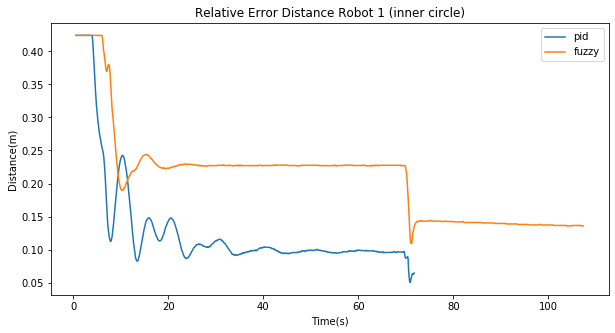

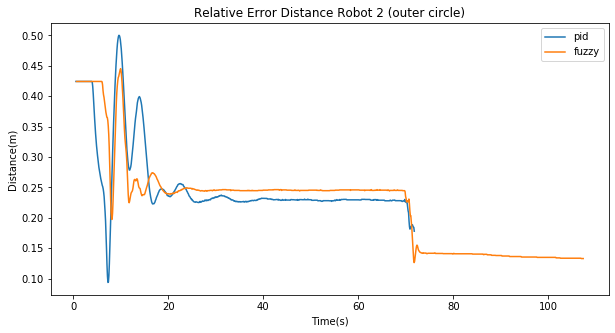

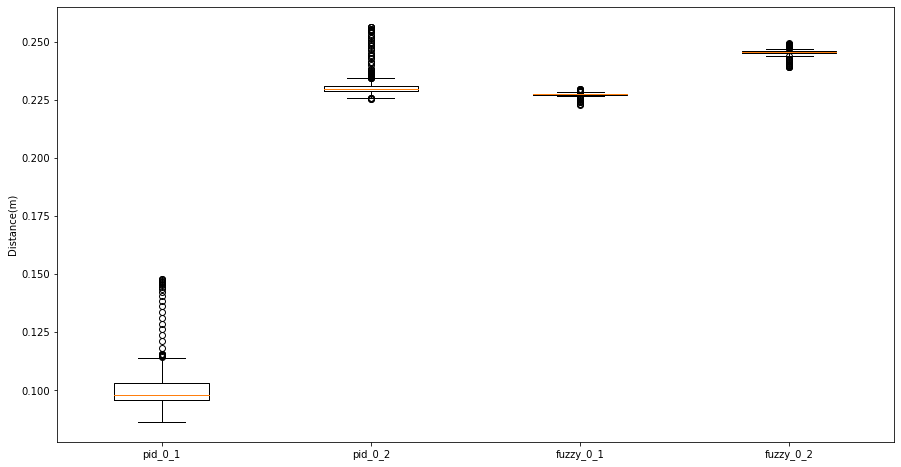

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os


# 設定資料夾路徑
file_pid = '/home/ubuntu/catkin_ws/src/turtlebot_sim/raw_data/pid/20230821201313.csv'
file_fuzzy = '/home/ubuntu/catkin_ws/src/turtlebot_sim/raw_data/fuzzy/20230822163756.csv'

# 檢查 csv 檔案是否存在
try:
    if os.path.exists(file_pid):
        print('file_pid exists')
    else:
        print('file_pid not exists')
    if os.path.exists(file_fuzzy):
        print('file_fuzzy exists')
    else:
        print('file_fuzzy not exists')
except: 
    print('file not exists')




# 請根據實際檔案路徑進行修改
# data = pd.read_csv(csv_path)
data_pid = pd.read_csv(file_pid)
data_fuzzy = pd.read_csv(file_fuzzy)

# # calculate error distance
data_pid['error_distance_1'] = np.sqrt(data_pid['relative_err_robot_1_x']**2 + data_pid['relative_err_robot_1_y']**2)
data_pid['error_distance_2'] = np.sqrt(data_pid['relative_err_robot_2_x']**2 + data_pid['relative_err_robot_2_y']**2)

data_fuzzy['error_distance_1'] = np.sqrt(data_fuzzy['relative_err_robot_1_x']**2 + data_fuzzy['relative_err_robot_1_y']**2)
data_fuzzy['error_distance_2'] = np.sqrt(data_fuzzy['relative_err_robot_2_x']**2 + data_fuzzy['relative_err_robot_2_y']**2)

print(data_pid.columns)

# 兩張圖 分別比較 pid 與 fuzzy 的 error_distance_1 與 error_distance_2
plt.figure(figsize=(10, 5))
plt.plot(data_pid['timestamp'], data_pid['error_distance_1'], label='pid')
plt.plot(data_fuzzy['timestamp'], data_fuzzy['error_distance_1'], label='fuzzy')
plt.xlabel('Time(s)')
plt.ylabel('Distance(m)')
plt.title('Relative Error Distance Robot 1 (inner circle)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(data_pid['timestamp'], data_pid['error_distance_2'], label='pid')
plt.plot(data_fuzzy['timestamp'], data_fuzzy['error_distance_2'], label='fuzzy')
plt.xlabel('Time(s)')
plt.ylabel('Distance(m)')
plt.title('Relative Error Distance Robot 2 (outer circle)')
plt.legend()
plt.show()

#  分析 20s ~ 60s 的 error_distance_1 與 error_distance_2
start_time = 20
end_time = 65

# boxplot(data_pid_20_60['error_distance_1'], data_pid_20_60['error_distance_2'], data_fuzzy_20_60['error_distance_1'], data_fuzzy_20_60['error_distance_2'])
data_pid_20_60 = data_pid[(data_pid['timestamp'] >= start_time) & (data_pid['timestamp'] <= end_time)]
data_fuzzy_20_60 = data_fuzzy[(data_fuzzy['timestamp'] >= start_time) & (data_fuzzy['timestamp'] <= end_time)]

plt.figure(figsize=(15, 8))
plt.boxplot([data_pid_20_60['error_distance_1'],
            data_pid_20_60['error_distance_2'],
            data_fuzzy_20_60['error_distance_1'],
            data_fuzzy_20_60['error_distance_2']],
            labels=['pid_0_1', 'pid_0_2', 'fuzzy_0_1', 'fuzzy_0_2'])
plt.ylabel('Distance(m)')
# plt.title('Boxplot of Relative Error Distance (20s ~ 60s)')
plt.show()




In [71]:
# Table view (show mean, std, max, min) 
data_pid_20_60['error_distance_1'].describe()
data_pid_20_60['error_distance_2'].describe()
data_fuzzy_20_60['error_distance_1'].describe()
data_fuzzy_20_60['error_distance_2'].describe()

# Using panda dataframe to show the result
columns = ['mean', 'std', 'max', 'min']
index = ['pid_0_1', 'pid_0_2', 'fuzzy_0_1', 'fuzzy_0_2']

data = [[data_pid_20_60['error_distance_1'].mean(), data_pid_20_60['error_distance_1'].std(), data_pid_20_60['error_distance_1'].max(), data_pid_20_60['error_distance_1'].min()],
        [data_pid_20_60['error_distance_2'].mean(), data_pid_20_60['error_distance_2'].std(), data_pid_20_60['error_distance_2'].max(), data_pid_20_60['error_distance_2'].min()],
        [data_fuzzy_20_60['error_distance_1'].mean(), data_fuzzy_20_60['error_distance_1'].std(), data_fuzzy_20_60['error_distance_1'].max(), data_fuzzy_20_60['error_distance_1'].min()],
        [data_fuzzy_20_60['error_distance_2'].mean(), data_fuzzy_20_60['error_distance_2'].std(), data_fuzzy_20_60['error_distance_2'].max(), data_fuzzy_20_60['error_distance_2'].min()]]

df = pd.DataFrame(data, columns=columns, index=index)

## round to 4 decimal places in python pandas
df = df.round(4)

# # Save the result to csv file
df.to_csv('/home/ubuntu/catkin_ws/src/turtlebot_sim/raw_data/result.csv')

# # Show the result
df


,mean,std,max,min
pid_0_1,0.1010,0.0103,0.1480,0.0863
pid_0_2,0.2313,0.0059,0.2563,0.2252
fuzzy_0_1,0.2273,0.0008,0.2297,0.2228
fuzzy_0_2,0.2454,0.0014,0.2496,0.2391
